# Versuch 1: Statistik I: Würfel-Simulation

In [ ]:
#Name: Finn Jannik Wagner
#Matrikelnummer: 8102237
#E-Mail-Adresse: finn.jannik.wagner@physik.uni-giessen.de
#Studiengang: Physik
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher mindestens dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen in Ihrem Protokoll beantworten.

##### Aufgabenstellung: 
Für die folgenden Aufgaben werden die Ergebnisse von Würfelwürfen untersucht. <br><br>
a) Berechnen Sie zunächst (auf Papier) den Erwartungswert, sowie die Standardabweichung eines 6-seitigen Würfels, für die Augensumme von i) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
b) Berechnen Sie zunächst den Erwartungswert, sowie die Standardabweichung eines 20-seitigen Würfels, für i) die Augenzahl eines Würfels, sowie für die Augensumme von ii) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
c) Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment. Dabei soll ein 20-seitiger Würfel i) $n = 100$ mal, ii) $n = 1000$ und iii) $n = 10000$ mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b). Anmerkung: "example" ist ein Platzhalter für den Namen der PDF-Datei, welche abgespeichert wird. Verwenden Sie unterschiedliche Namen, sonst wird die Datei überschrieben.<br><br>
d) Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). <br><br>
e) Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen?  <br><br>
f) Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_search(x = points, sigma, mu, save = "example") einen Fit durch. Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die $\chi ^2$ Werte. Welcher Wert ist besonders hoch/gering und woran könnte das liegen? <br><br>
g) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels i) mindestens einmal die 20 fällt? ii) höchstens 2 mal die 1 fällt? iii) genau 3 mal die 5 fällt? iv) genau 3 mal die 5 UND höchstens 2 mal die 1 (Tipp: Baumdiagramm kann helfen)


##### Bemerkung: 
Sie können gerne auch mit anderen Werten herumspielen, um ein besseres Gefühl für die Zusammenhänge zu bekommen. Verwenden Sie in diesem Fall die entsprechende Funktion ohne das save-Argument, also dice(n, m, k) anstatt dice(n, m, k, save). Für die Auswertung sind der Werte aus der Aufgabenstellung relevant.

In [62]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import math

In [83]:
def dice (n, m, k, save = False):                                       
    
    """
    dice(n, m, k, save) 
    n = Anzahl der Würfelwürfe (Integer), 
    m = Anzahl der Würfel (Integer), 
    k = Anzahl der Würfelseiten (Integer) 
    save = Name des PDFs (String)
    
    Funktion plottet Histogramm eines simulierten Würfelexperiments, inklusive Markierung für den Mittelwert
    und gibt den Array, den Mittelwert und die Standardabweichung der 
    Augensummen aus. Zumdem wird ein PDF erstellt, falls save übergeben wird
    """
    m1 = m
    k1 = k
    dice_matrix=np.array([])                                            #leeres Array zum Auffüllen
    for i in range (n):
        dice_row=np.array([])
        for j in range (m):
            dice_row=np.append(dice_row,[rnd.randint(1,k+1)])           #m-er Reihe wird erzeugt. Gefüllt durch Randoms
        dice_matrix= np.append(dice_matrix,[dice_row])                  #n-te m-er Reihe wird dem Array hinzugefügt
    dice_sum = sum(dice_matrix.reshape(n,m).transpose())                #Summe der Augenzahlen
    plt.hist(dice_sum, bins = (k-1)*m+1, 
             range = (m, m*k), color = 'limegreen' , density = True)    #Histogram mit relativen Häufigkeit
    plt.axvline(np.mean(dice_sum),color='black' ,linestyle='--')        #vertikale Linie des Mittelwertes
    plt.xlabel("Augenzahl")                                             #Bezeichnung x-Achse
    plt.ylabel("Relative Häufigkeit")                                   #Bezeichnung y-Achse
    if (save != False):                                                 #wenn save ein String s ist, wird ein PDF mit dem Namen s gespeichert
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()                                                          #Plot
    print ("Arithmetisches Mittel: ", np.mean(dice_sum), "\nEmpirische Standardabweichung: ", np.std(dice_sum) )              
    return (dice_sum, np.mean(dice_sum), np.std(dice_sum), k1, m1 )             #Array, Mittelwert und Standardabweichung der Augensummen


def gauss(sigma, mu, x):
    a = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
    return a   

def chi_squared(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    a= sum((((gauss(sigma, mu, A[1][:-1]) - A[0]) **2) /gauss(sigma, mu, A[1][:-1])))
    plt.plot(np.linspace(0, m*k+2, 1000), gauss(sigma, mu, np.linspace(0, m*k+2, 1000)), 'r')
    plt.xlabel("Augenzahl")
    plt.ylabel("Relative Häufigkeit")
    if (save != False):
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()
    print("chi-Quadrat:", a )
    pass


# Aufgabe 1a)
Erwartungswerte von 6-seitigen Würfeln
## 1 Würfel:
Alle 6 Werte des Würfels sind gleich wahrscheinlich mit der Wahrscheinlichkeit 1/6. <br>
Der Erwartungswert $µ$ ist damit $1*1/6 + 2 * 1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = µ = 3.5$ <br>
Die Standardabweichung ist $math.sqrt(1/6*(3.5 - 1)**2 + 1/6*(3.5 - 2)**2 + 1/6*(3.5 - 3)**2 + 1/6*(3.5 - 4)**2 + 1/6*(3.5 - 5)**2 + 1/6*(3.5 - 6)**2) = math.sqrt(17.5/6) ≈ 1.71$
    
## 2 Würfel:
Da einzelne Würfelwürfe unabhängig von einander sind und für den Erwartungswert Linearität gilt, ist der Erwartungswert für $n$ Würfel $n*3.5$ <br>
In diesem Fall also $µ = 2*3.5 = 7$
    
Die Standardabweichung ist $math.sqrt( 1/36*(7 - 2)**2 + 2/36*(7 - 3)**2 + 3/36*(7 - 4)**2 + 4/36*(7 - 5)**2 + 5/36*(7 - 6)**2 + 6/36*(7 - 7)**2 + 5/36*(7 - 8)**2 + 4/36*(7 - 9)**2 + 3/36*(7 - 10)**2 + 2/36*(7 - 11)**2 + 1/36*(7 - 12)**2) = math.sqrt(35/6) = math.sqrt(2 * 17.5/6) ≈ 2.42$
Für die Varianz gilt bei unabhängigen Würfelwürfen ebenfalls Linearität, diese lässt sich da die Wurzelfunktion monoton ist auch auf die Standardabweichung übertragen.
Die Standardabweichung für zwei Würfel ist die eines Würfels mal den Faktor $math.sqrt(2)$.
    
## 5 Würfel:
Erwartungswert µ = 5*3.5 = 17.5 <br>
Standardabweichung σ = math.sqrt(5 * 17.5/6) ≈ 3.82
    
## 10 Würfel:
Erwartungswert µ = 10*3.5 = 25 <br>
Standardabweichung σ = math.sqrt(10 * 17.5/6) ≈ 5.4

# Aufgabe 1b)

Wir nehmen an das sich bei dem Würfel um einen Ikosaeder handelt, alle Seiten also die gleiche Wahrscheinlichkeit 1/20 haben.

## 1 Würfel:
Der Erwartungswert ist damit $µ = 1*1/20 + 2*1/20 + 3*1/20 + ... = 1/20 * (1+2+3+...) = (20+1)/2 * 20 * 1/20 = 21/2 = 10.5$
Die Standardabweichung ist $σ = math.sqrt(1/20 * sum([(10.5 - i)**2 $for i in range$(1, 20+1)])) = math.sqrt(133/4) ≈ 5.77$

Äquivalent zu einem 6 seitigen Würfel lassen sich Erwartungswert und Standardabweichung für mehrere Würfe auf Grund von Monotonie einfach bestimmen.

## 2 Würfel:
Erwartungswert $µ = 2*10.5 = 21$ <br>
Standardabweichung $σ = math.sqrt(2 * 133/4) ≈ 8.15$
    
## 5 Würfel:
Erwarungswert $µ = 5*10.5 = 52.5$ <br>
Standardabweichung $σ = math.sqrt(5 * 133/4) ≈ 12.89$

## 10 Würfel:
Erwarungswert $µ = 10*10.5 = 105$ <br>
Standardabweichung $σ = math.sqrt(10 * 133/4) ≈ 18.23$

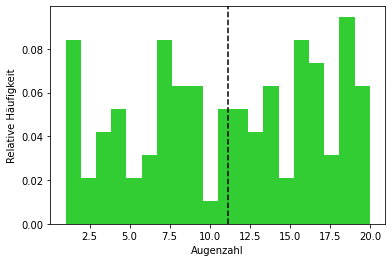

Arithmetisches Mittel:  11.13 
Empirische Standardabweichung:  5.986075509045972


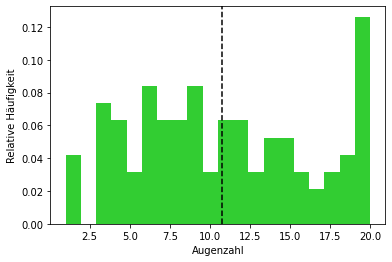

Arithmetisches Mittel:  10.78 
Empirische Standardabweichung:  5.740348421481052


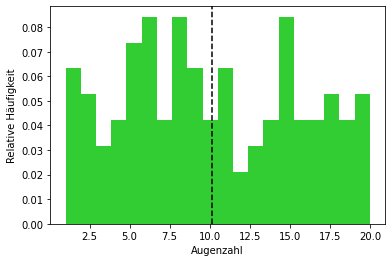

Arithmetisches Mittel:  10.13 
Empirische Standardabweichung:  5.710788036689857


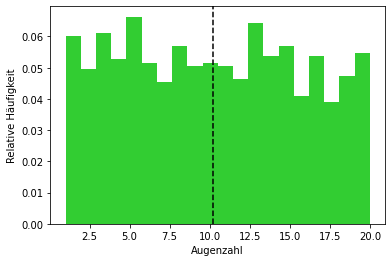

Arithmetisches Mittel:  10.214 
Empirische Standardabweichung:  5.769419728187575


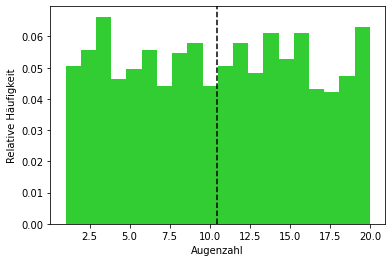

Arithmetisches Mittel:  10.445 
Empirische Standardabweichung:  5.794736836129833


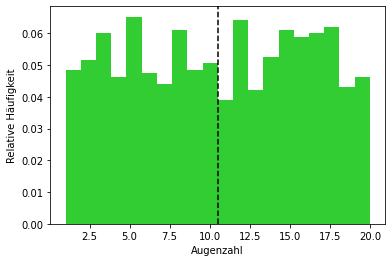

Arithmetisches Mittel:  10.538 
Empirische Standardabweichung:  5.750874368302615


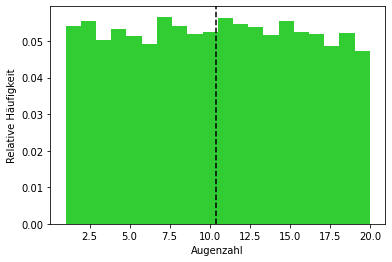

Arithmetisches Mittel:  10.412 
Empirische Standardabweichung:  5.719427943422314


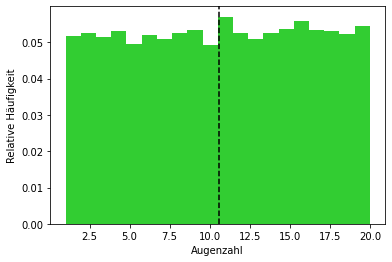

Arithmetisches Mittel:  10.5795 
Empirische Standardabweichung:  5.771401887756561


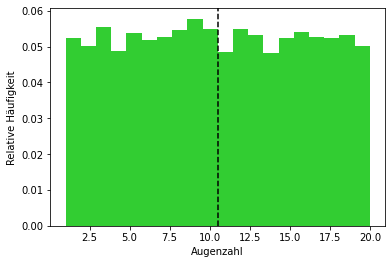

Arithmetisches Mittel:  10.4872 
Empirische Standardabweichung:  5.735733271343777


In [64]:
#Aufgabe 1c)

"""
Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment.
Dabei soll ein 20-seitiger Würfel i) 𝑛=100 mal, ii) 𝑛=1000 und iii) 𝑛=10000 mal geworfen werden.
Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b).
"""

dice1_1 = dice(n=100, m=1, k=20) # Erstes Ergebnis für 100 Würfe
dice1_2 = dice(n=100, m=1, k=20) # Zweites Ergebnis für 100 Würfe
dice1_3 = dice(n=100, m=1, k=20) # Drittes Ergebnis für 100 Würfe
dice1 = [dice1_1, dice1_2, dice1_3]

dice2_1 = dice(n=1000, m=1, k=20) # Erstes Ergebnis für 1000 Würfe
dice2_2 = dice(n=1000, m=1, k=20) # Zweites Ergebnis für 1000 Würfe
dice2_3 = dice(n=1000, m=1, k=20) # Drittes Ergebnis für 1000 Würfe
dice2 = [dice2_1, dice2_2, dice2_3]

dice3_1 = dice(n=10000, m=1, k=20) # Erstes Ergebnis für 10000 Würfe
dice3_2 = dice(n=10000, m=1, k=20) # Zweites Ergebnis für 10000 Würfe
dice3_3 = dice(n=10000, m=1, k=20) # Drittes Ergebnis für 10000 Würfe
dice3 = [dice3_1, dice3_2, dice3_3]


In [65]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Mittelwert für 100 Würfe
dices = dice1
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {100} Würfen '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

Die drei experimentellen Werte für das arithmetische Mittel bei 100 Würfen eines 20 seitigen Würfels sind: 11.13, 10.78, 10.13
Der Mittelwert der experimentelen Ergebnisse µ=10.6800 ist eine mäßig gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.1800.


In [66]:
#Auswertung Mittelwert für 1000 Würfe
dices = dice2
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {1000} Würfen '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

Die drei experimentellen Werte für das arithmetische Mittel bei 1000 Würfen eines 20 seitigen Würfels sind: 10.214, 10.445, 10.538
Der Mittelwert der experimentelen Ergebnisse µ=10.3990 ist eine mäßig gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.1010.


In [67]:
#Auswertung Mittelwert für 10000 Würfe
dices = dice3
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {10000} Würfen '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

Die drei experimentellen Werte für das arithmetische Mittel bei 10000 Würfen eines 20 seitigen Würfels sind: 10.412, 10.5795, 10.4872
Der Mittelwert der experimentelen Ergebnisse µ=10.4929 ist eine gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf 1 Nachkommastellen genau mit einer Abweichung von 0.0071.


In [77]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Standardabweichung für 100 Würfe
dices = dice1
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
σ = np.sqrt((dices[0][1]-µ)**2+(dices[1][1]-µ)**2+(dices[2][1]-µ)**2)
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-σ)

print(f'Die Standardabweichung für {100} Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen '
      f'Ergebnissen {σ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse betägt {σ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')

Die Standardabweichung für 100 Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen Ergebnissen σ=0.7176 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse betägt σ=0.7176 sie hat eine Abweichung von 1.5224 vom theoretischen Wert 2.24.


In [69]:
#Auswertung Standardabweichung für 1000 Würfe
dices = dice2
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
σ = np.sqrt((dices[0][1]-µ)**2+(dices[1][1]-µ)**2+(dices[2][1]-µ)**2)
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-σ)

print(f'Die Standardabweichung für {1000} Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen '
      f'Ergebnissen {σ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse betägt {σ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')

Die Standardabweichung für 1000 Würfe beträgt bei den berechneten experimentellen Ergebnissen σ=0.2359


In [78]:
#Auswertung Standardabweichung für 10000 Würfe
dices = dice3
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
σ = np.sqrt((dices[0][1]-µ)**2+(dices[1][1]-µ)**2+(dices[2][1]-µ)**2) # <----- Die Formel falsch???
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-σ)

print(f'Die Standardabweichung für {10000} Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen '
      f'Ergebnissen {σ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse betägt {σ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')
TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO: WARUM SO GROßE ABWEICHUNGEN???????????????????????????????????????????????????

Die Standardabweichung für 10000 Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen Ergebnissen σ=0.1186 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse betägt σ=0.1186 sie hat eine Abweichung von 5.6514 vom theoretischen Wert 5.77.


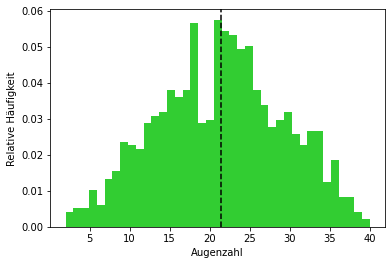

Arithmetisches Mittel:  21.424 
Empirische Standardabweichung:  8.117772108158741


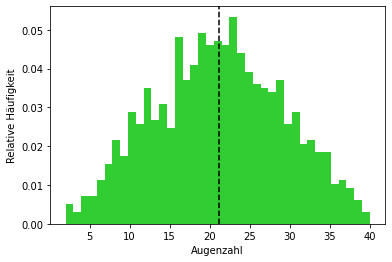

Arithmetisches Mittel:  21.137 
Empirische Standardabweichung:  8.23251061341557


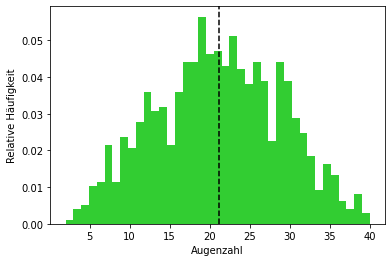

Arithmetisches Mittel:  21.124 
Empirische Standardabweichung:  8.035709302855599


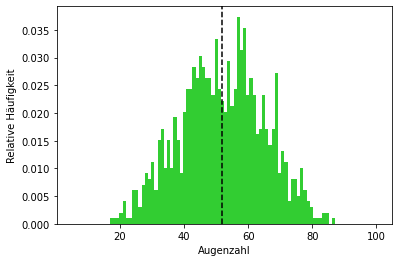

Arithmetisches Mittel:  51.9 
Empirische Standardabweichung:  13.293833156768592


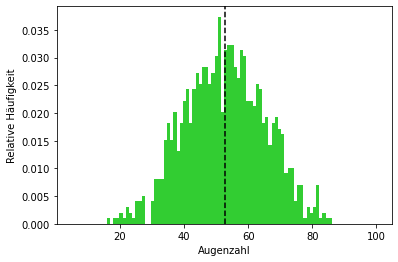

Arithmetisches Mittel:  52.862 
Empirische Standardabweichung:  12.634118726686085


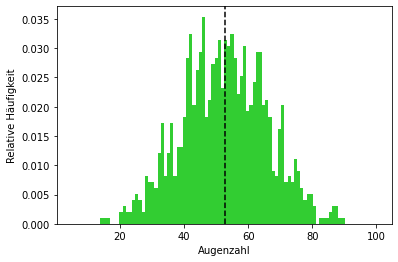

Arithmetisches Mittel:  52.718 
Empirische Standardabweichung:  13.402032532418357


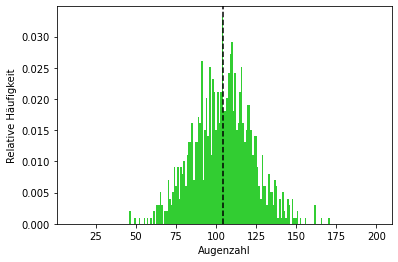

Arithmetisches Mittel:  104.611 
Empirische Standardabweichung:  18.74517748648969


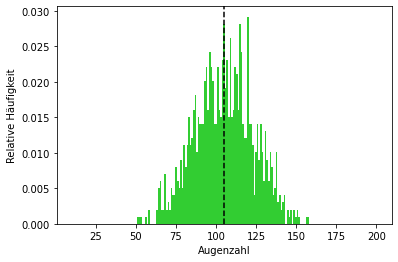

Arithmetisches Mittel:  105.017 
Empirische Standardabweichung:  18.56724834217499


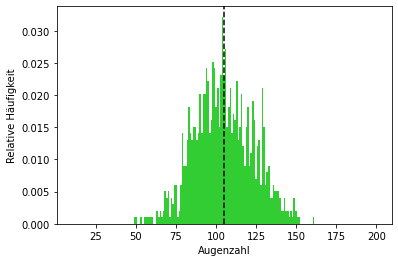

Arithmetisches Mittel:  104.724 
Empirische Standardabweichung:  18.40042999497566


In [71]:
#Aufgabe 1d)
"""
Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. 
Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden.
Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). 
"""
dice4_1 = dice(n=1000, m=2, k=20) #Erstes Ergebnis für 2 Würfel
dice4_2 = dice(n=1000, m=2, k=20) #Zweites Ergebnis für 2 Würfel
dice4_3 = dice(n=1000, m=2, k=20) #Drittes Ergebnis für 2 Würfel
dice4 = [dice4_1, dice4_2, dice4_3]

dice5_1 = dice(n=1000, m=5, k=20) #Erstes Ergebnis für 5 Würfel
dice5_2 = dice(n=1000, m=5, k=20) #Zweites Ergebnis für 5 Würfel
dice5_3 = dice(n=1000, m=5, k=20) #Drittes Ergebnis für 5 Würfel
dice5 = [dice5_1, dice5_2, dice5_3]

dice6_1 = dice(n=1000, m=10, k=20) #Erstes Ergebnis für 10 Würfel
dice6_2 = dice(n=1000, m=10, k=20) #Zweites Ergebnis für 10 Würfel
dice6_3 = dice(n=1000, m=10, k=20) #Drittes Ergebnis für 10 Würfel
dice6 = [dice6_1, dice6_2, dice6_3]

In [79]:
#Auswertung Mittelwert für 2 Würfel
dices = dice4
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 21
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {2} Würfeln '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte für das arithmetische Mittel bei 2 Würfeln eines 20 seitigen Würfels sind: 21.424, 21.137, 21.124
Der Mittelwert der experimentelen Ergebnisse µ=21.2283 ist eine mäßig gute Aproximation des berechneten Werts von 21. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.2283


In [80]:
#Auswertung Mittelwert für 5 Würfel
dices = dice5
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 52.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {5} Würfeln '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte für das arithmetische Mittel bei 5 Würfeln eines 20 seitigen Würfels sind: 51.9, 52.862, 52.718
Der Mittelwert der experimentelen Ergebnisse µ=52.4933 ist eine gute Aproximation des berechneten Werts von 52.5. Der experimentele Wert ist auf 1 Nachkommastellen genau mit einer Abweichung von 0.0067


In [81]:
#Auswertung Mittelwert für 10 Würfel
dices = dice6
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 105
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {10} Würfeln '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte für das arithmetische Mittel bei 10 Würfeln eines 20 seitigen Würfels sind: 104.611, 105.017, 104.724
Der Mittelwert der experimentelen Ergebnisse µ=104.7840 ist eine mäßig gute Aproximation des berechneten Werts von 105. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.2160


In [ ]:
#Auswertung Standardabweichung für 2 Würfel
Standardabweichung σ = math.sqrt(2 * 133/4)

In [ ]:
#Auswertung Standardabweichung für 5 Würfel 
σ = math.sqrt(5*133/4)

In [ ]:
#Auswertung Standardabweichung für 10 Würfel 
σ = math.sqrt(10*133/4)

In [ ]:
#Aufgabe 1e) 

"""
Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen? 

Ja, die Werte entsprachen meinen Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst
in der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgeführt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.

Die Ergebnisse der durchgeführten Versuche wurden wiedererwartens nicht konstant mit steigender Durchführungszahl immer genauer.
Die Abweichungen beim wiederholten Werfen des 20-seitigen Würfels waren 0.04, 0.106 und 0.0459. Hier ist sogar das erste Ergebnis bei dem nur 100 mal geworfen wurde
näher am theoretischen Wert als beide Versuche mit 10 und 100 mal so vielen Würfen.
Ebenso gibt es bei den berechneten Standardabweichungen einen Ausreißer da der Wert für 3 Versuche mit 1000 größer ist, als für 100
Die Standardabweichungen bei den wiederholten Versuchen waren auch relativ klein.
Um also aus Experimenten Gesetzmäßigkeiten herzuleiten ist es also unbedingt von Vorteil möglichst viele Experimente durchzuführen um einen möglichst genauen Mittelwert zu bestimmen.
TODO Mehr
"""

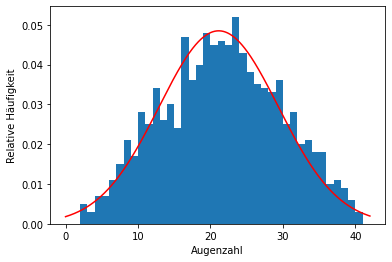

chi-Quadrat: 0.03584708347018214


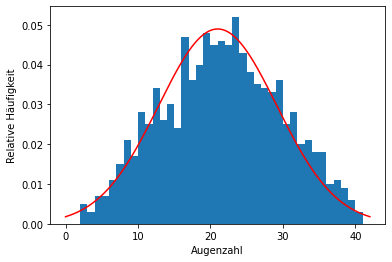

chi-Quadrat: 0.03873502734500955


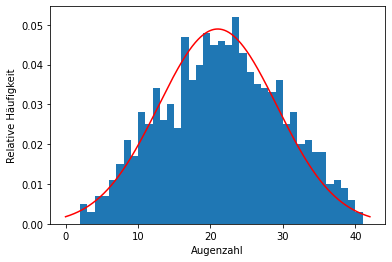

chi-Quadrat: 0.03869848893236543


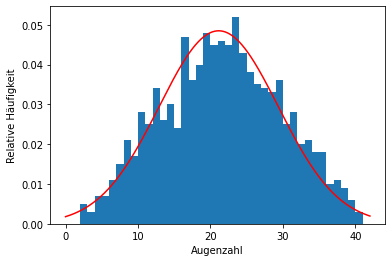

chi-Quadrat: 0.035879016455926616
8.23251061341557   8.154753215150045


'\nDiese sind für die Gaußfunktion, die nur von σ und µ der Datenmenge abhängt.\n'

In [99]:
#Aufgabe 1f)
"""
Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_search(x = points, sigma, mu, save = "example") einen Fit durch.
Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die 𝜒2 Werte.
Welcher Wert ist besonders hoch/gering und woran könnte das liegen? 

chi_squared(dice4[1], sigma = ?, mu = ?)
chi_squared(dice5[1], sigma = ?, mu = ?)
chi_squared(dice6[1], sigma = ?, mu = ?)
TODO AUFGABE BEARBEITEN

Steht im Skript erklärt. 3.1.5 in der Aufgabenstellung"""
chi_squared(dice4[1], sigma = dice4[1][2], mu= dice4[1][1])
chi_squared(dice4[1], sigma = math.sqrt(266/4), mu=21)
"""
Diese sind für die Gaußfunktion, die nur von σ und µ der Datenmenge abhängt.
"""

# chi_squared(dice5[1], sigma = 12.966268507168898, mu=52.391)
# chi_squared(dice6[1], sigma = 18.34285430351558, mu=104.764)

# Aufgabe 1g)
Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels <br>
i) mindestens einmal die 20 fällt? <br>
ii) höchstens 2 mal die 1 fällt? <br>
iii) genau 3 mal die 5 fällt? <br>
iv) genau 3 mal die 5 UND höchstens 2 mal die 1 <br>
(Tipp: Baumdiagramm kann helfen) <br>

## i) Wir betrachten die Wahrscheinlichkeit das die 20 überhaupt nicht fällt.
In jedem Wurf bleiben von den 20 Möglichkeiten noch 19 übrig. <br>
q ist damit = (1 - p)**10 = (19/20)**10<br>
Die gesuchte Wahrscheinlichkeit ist dann p = 1 - q = 1 - (19/20)**10 ≈ 0.401 

## ii) 
Die Wahrscheinlichkeit auf eine 1 ist p = 1/20 <br>
Wir betrachten nun die Wahrscheinlichkeiten das die Eins 0 mal, 1 mal oder 2 mal gewürfelt wird. <br>
Die Wahrscheinlichkeit das bei n Würfen die Zahl, mit Wahrscheinlichkeit p, genau k-mal vorkommt ist: <br>
$p(x=k) = n!/(k! * (n-k)!) * p**k * (1-p)**(n-k)$

Die Wahrscheinlichkeit das die gar nicht 1 fällt ist $(19/20)**10 ≈ 0.599$
$p(k=0) = math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) ≈ 0.599$
$p(k=1) = math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) ≈ 0.315$
$p(k=2) = math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2) ≈ 0.075$

Die gesuchte Wahrscheinlichkeit ist damit $P = p(k=0) + p(k=1) + p(k=2) ≈ 0.988496$

## iii)
Die Wahrscheinlichkeit das genau 3 mal die 5 fällt lässt sich mit der Formel aus Aufgabenteil ii) berechnen
$p(k=3) = math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) ≈ 0.0105$

## iv)
Die beiden Ereignisse ii) und iii) sind stochastisch unabhängig dann <br>
p(ii) * p(iii) = <br>
    math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
        math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) + <br>
        math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) + <br>
        math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2)) <br>
≈ 0.01038

Die beiden Ereignisse sind stochastisch abhängig: <br>
Damit das Ereignis eintritt müssen 3 Würfel eine 5 zeigen. Die übrigen 7 Würfel können nun 0, 1 oder 2 Einsen zeigen. <br>
Also p(iii) * (p(k=0) + p(k=1) + p(k=2)) <br>
math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
    math.factorial(7)/(math.factorial(0) * math.factorial(7-0)) * (1/20)**0 * (1-1/20)**(7-0) + <br>
    math.factorial(7)/(math.factorial(1) * math.factorial(7-1)) * (1/20)**1 * (1-1/20)**(7-1) + <br>
    math.factorial(7)/(math.factorial(2) * math.factorial(7-2)) * (1/20)**2 * (1-1/20)**(7-2)) <br>
≈ 0.01043570419298467


# TODO IV Richtig???